## Compute 2D FFT

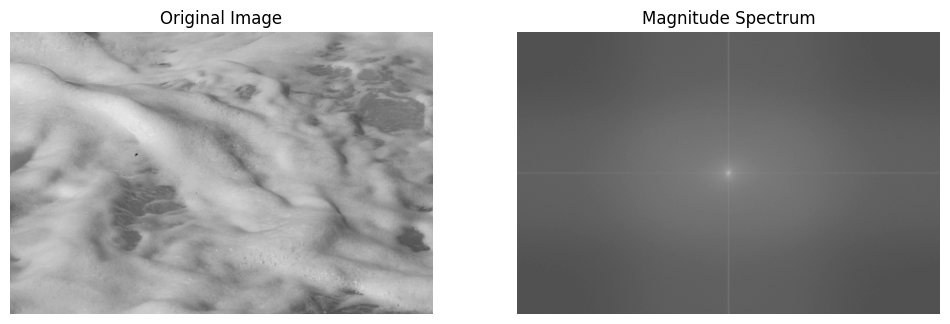

In [26]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = '../image_database/DSC03582.jpg'  # Adjust the path to your image
image = Image.open(image_path).convert('L')  # Convert image to grayscale

# Step 2: Perform the 2D FFT
# Convert the image to an array and compute the FFT
image_array = np.array(image)
fft_result = np.fft.fft2(image_array)

# Shift the zero frequency component (DC component) to the center
fft_shifted = np.fft.fftshift(fft_result)

# Step 3: Compute the magnitude spectrum
magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)  # Use log scale for better visibility

# Step 4: Plot the original image and its FFT
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()


## Compute Fractal Dimension

Fractal Dimension: 1.7943240904074433


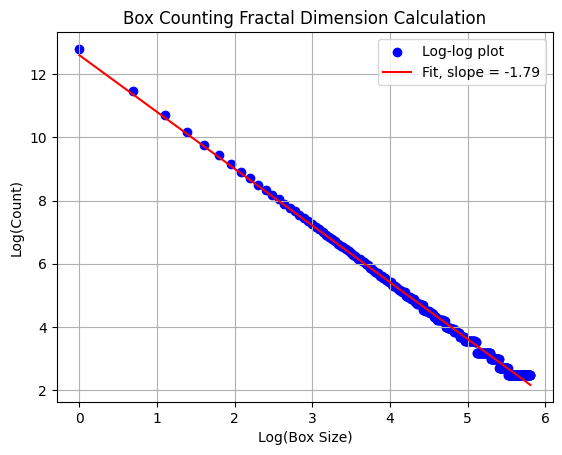

In [62]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def box_count(img, k):
    S = np.add.reduceat(
        np.add.reduceat(img, np.arange(0, img.shape[0], k), axis=0),
        np.arange(0, img.shape[1], k), axis=1)
    return len(np.where(S > 0)[0])

def fractal_dimension(img, max_box_size=None):
    img = (img < 128).astype(int)  # Binarize image
    p = min(img.shape)  # Minimal dimension of image
    max_box_size = max_box_size or p // 2  # Maximum box size
    sizes = np.arange(1, max_box_size + 1)
    counts = [box_count(img, size) for size in sizes]
    logs = np.log(sizes)
    logcounts = np.log(counts)
    coeffs = np.polyfit(logs, logcounts, 1)
    return -coeffs[0], coeffs, logs, logcounts  # Return fractal dimension and othe

# Load image
image_path = '../image_database/DSC03582.jpg'
image = Image.open(image_path).convert('L')
image_array = np.array(image)

# downsample the image to speed up computation
image_array = image_array[::6, ::6]

# Compute fractal dimension
fd, coeffs, logs, logcounts = fractal_dimension(image_array)
print("Fractal Dimension:", fd)

# Optionally, plot the curve to see the linear fit
plt.figure()
plt.scatter(logs, logcounts, color='blue', label='Log-log plot')
plt.plot(logs, np.polyval(coeffs, logs), color='red', label=f'Fit, slope = {coeffs[0]:.2f}')
plt.xlabel('Log(Box Size)')
plt.ylabel('Log(Count)')
plt.legend()
plt.title('Box Counting Fractal Dimension Calculation')
plt.grid(True)
plt.show()


### Compute FD for all images in the database folder

In [68]:
import os
import pandas as pd
def compute_FD_images_from_folder(folder_path):
    fds = []  # List to store fractal dimensions
    df = pd.DataFrame(columns=['filename', 'FD'])
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image files
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path).convert('L')
            image_array = np.array(image)
            image_array = image_array[::6, ::6]  # Downsample the image

            fd, _, _, _ = fractal_dimension(image_array)  # Compute fractal dimension
            fds.append(fd)
            # create dataframe with filename and FD
            df.loc[len(df)] = [filename, fd]
    return fds, df

# Define the path to your image folder
image_folder = '../image_database'
fds, df = compute_FD_images_from_folder(image_folder)

### Plot example images for different ranges of FD

C:\Users\User\AppData\Local\Temp\ipykernel_22396\1545347047.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


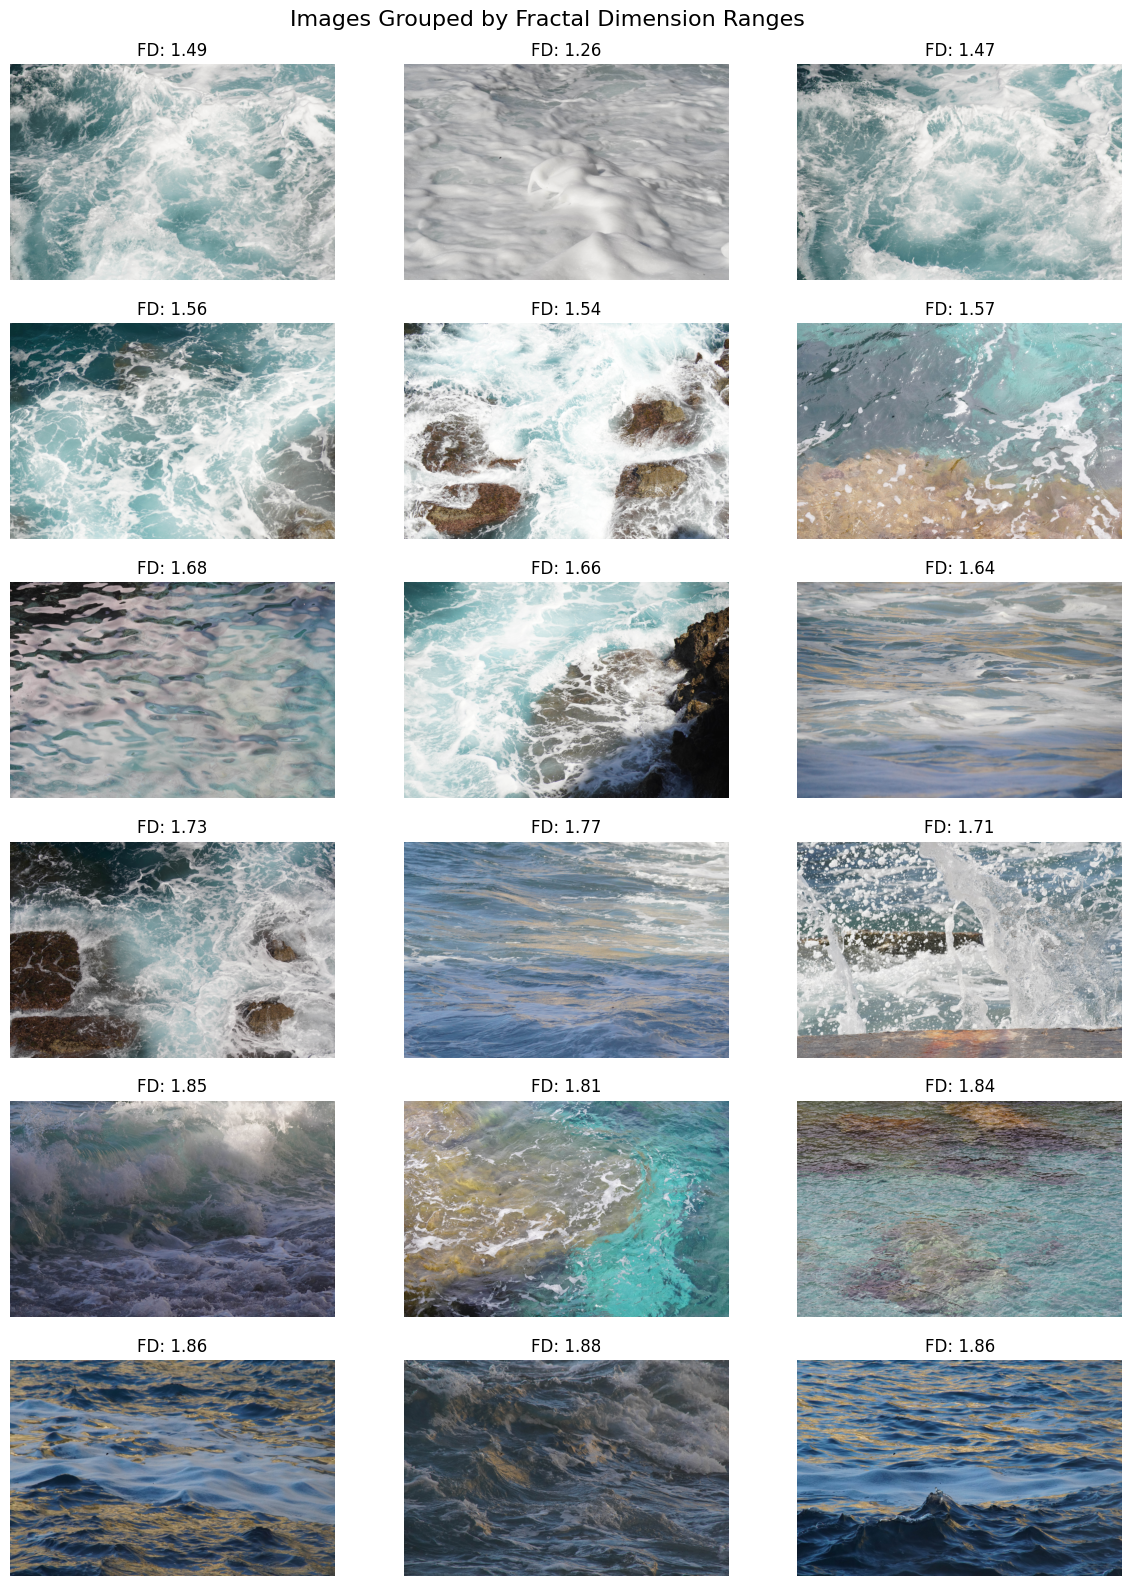

In [85]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

def plot_images_by_fd_ranges(df, folder_path, fd_ranges):
    # Adjust number of images per FD range
    num_images_per_range = 3
    num_ranges = len(fd_ranges)
    
    # Set up the figure with appropriate dimensions
    fig, axs = plt.subplots(num_ranges, num_images_per_range, figsize=(15, 3 * num_ranges), 
                            gridspec_kw={'wspace': 0.05, 'hspace': 0.2})
    
    for i, (low, high) in enumerate(fd_ranges):
        # Select three random images from each FD range
        range_images = df[(df['FD'] >= low) & (df['FD'] < high)].sample(num_images_per_range)
        
        # Adjust axes array for consistent indexing if there's only one range
        if num_ranges == 1:
            row_axes = [axs]
        else:
            row_axes = axs[i]

        # Add a subtitle for each range
        row_axes[0].set_ylabel(f'{low:.2f} - {high:.2f}', fontsize=14, labelpad=10)
        row_axes[0].yaxis.set_label_position("right")

        for j, row in enumerate(range_images.itertuples()):
            image_path = os.path.join(folder_path, row.filename)
            image = Image.open(image_path)
            # downsampling for faster display
            image = image.resize((image.width // 6, image.height // 6))
            ax = row_axes[j]
            ax.imshow(image)
            ax.set_title(f'FD: {row.FD:.2f}', fontsize=12)
            ax.axis('off')
    # main title
    plt.suptitle('Images Grouped by Fractal Dimension Ranges', fontsize=16)
    # minimize distance between suptitle and subplots
    plt.subplots_adjust(top=0.95)
    
    plt.tight_layout()
    plt.show()

# Define FD ranges
fd_ranges = [(1.2, 1.5), (1.5, 1.59), (1.6, 1.69), (1.7, 1.79), (1.8, 1.849), (1.85, 1.9)]

# Path to your image folder
image_folder = 'image_database'

# Call the function
plot_images_by_fd_ranges(df, image_folder, fd_ranges)


### Plot FD distribution

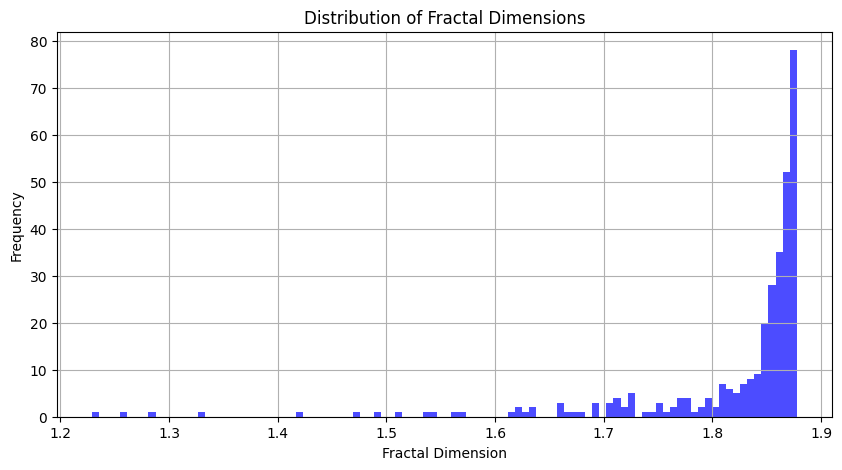

In [69]:
# Plot histogram of fractal dimensions
plt.figure(figsize=(10, 5))
plt.hist(fds, bins=100, color='blue', alpha=0.7)
plt.title('Distribution of Fractal Dimensions')
plt.xlabel('Fractal Dimension')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()